In [1]:
from __future__ import division, unicode_literals

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns
#plt.style.use('ggplot')

import numpy.random as rd
import sklearn.datasets as ds
import scipy.stats as st
from sklearn import datasets
import math

### 大数の法則






In [2]:
p = 0.4; n = 100000; m = 100000
trial = np.array([st.bernoulli.rvs(p=p, size=n) for _ in range(4)])
%timeit result = np.array([np.mean(trial[i, 0:j]) for j in range(m) for i in range(4)])

1 loops, best of 3: 39.8 s per loop


/Users/matsuken/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [3]:
result = []
for i in range(4):
    result.append(np.array([np.mean(trial[i, 0:j]) for j in range(m)]))

result = np.array(result)
df = pd.DataFrame(result.T, columns=['1st', '2nd', '3rd', '4th'])

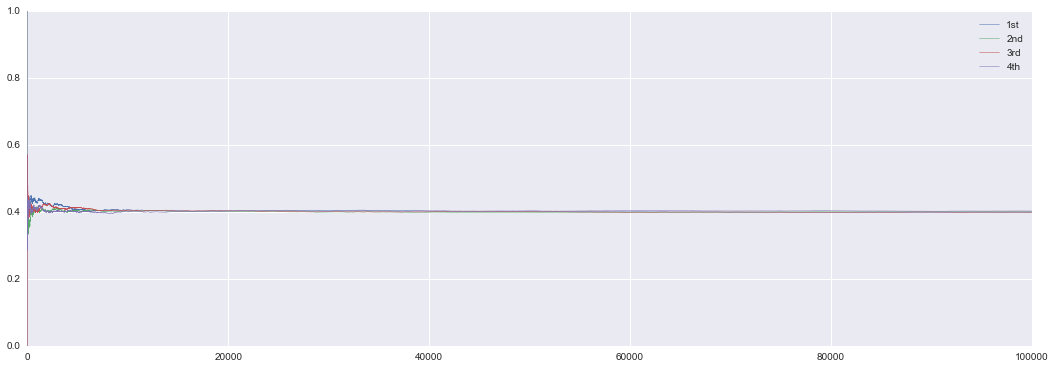

In [4]:
df.plot(figsize=(18,6), lw=.5)

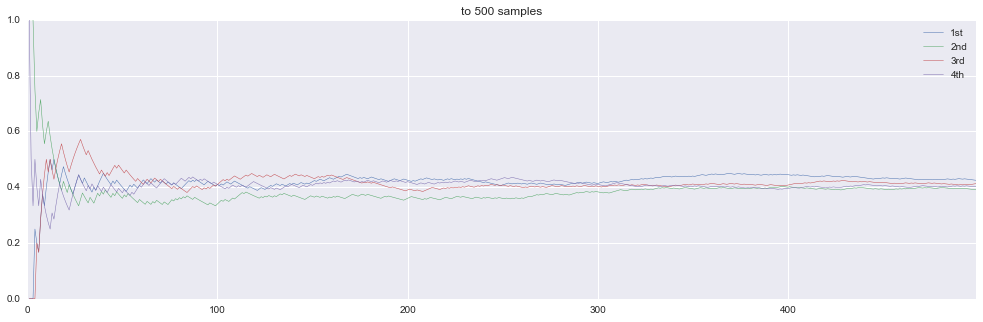

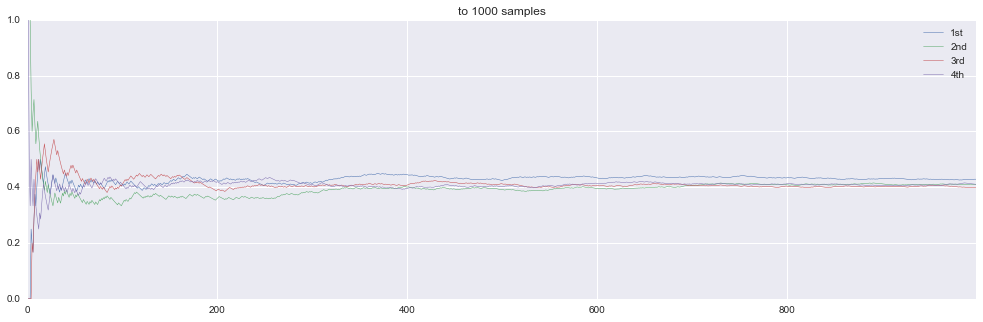

In [5]:
df[0:500].plot(figsize=(17,5), lw=.5, title="to 500 samples")
df[0:1000].plot(figsize=(17,5), lw=.5, title="to 1000 samples")

In [6]:
tab = []
for i in [5, 20, 50, 100, 99999]:
    tab.append(result[:,i])
pd.DataFrame(np.array(tab).T, index=['1st', '2nd', '3rd', '4th'], columns=[5, 20, 50, 100, 99999])

,5,20,50,100,99999
1st,0.2,0.45,0.40,0.41,0.398164
2nd,0.6,0.40,0.36,0.34,0.400724
3rd,0.2,0.50,0.46,0.41,0.399124
4th,0.4,0.35,0.38,0.41,0.402624


### 事前確率を圧倒するデータ

In [7]:
p_A1_list = [0.01, 0.05, 0.10,0.20,0.30, 0.40, 0.50]   # 全メールの中の迷惑メールの割合(事前確率)
p_B_A1 = 1.0/10.    # 迷惑メールには1/10
p_B_A2 = 1.0/100.   # 普通メールには1/100

print u"|事前確率|B|C|D|E|F|G|H|"
print u"|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|"
for p_A1 in p_A1_list:
    p = p_A1
    print "|{}".format(p),
    for i in range(7):
        p = (p_B_A1*p)/(p_B_A1*p + p_B_A2*(1-p))
        print "| {0:.8f} ".format(p), 
    print "|"


|事前確率|B|C|D|E|F|G|H|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|0.01 | 0.09174312  | 0.50251256  | 0.90991811  | 0.99019705  | 0.99901098  | 0.99990101  | 0.99999010  |
|0.05 | 0.34482759  | 0.84033613  | 0.98135427  | 0.99810360  | 0.99981004  | 0.99998100  | 0.99999810  |
|0.1 | 0.52631579  | 0.91743119  | 0.99108028  | 0.99910081  | 0.99991001  | 0.99999100  | 0.99999910  |
|0.2 | 0.71428571  | 0.96153846  | 0.99601594  | 0.99960016  | 0.99996000  | 0.99999600  | 0.99999960  |
|0.3 | 0.81081081  | 0.97719870  | 0.99767210  | 0.99976672  | 0.99997667  | 0.99999767  | 0.99999977  |
|0.4 | 0.86956522  | 0.98522167  | 0.99850225  | 0.99985002  | 0.99998500  | 0.99999850  | 0.99999985  |
|0.5 | 0.90909091  | 0.99009901  | 0.99900100  | 0.99990001  | 0.99999000  | 0.99999900  | 0.99999990  |


|事前確率|B|C|D|E|F|G|H|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|0.01 | 0.09174312  | 0.50251256  | 0.90991811  | 0.99019705  | 0.99901098  | 0.99990101  | 0.99999010  |
|0.05 | 0.34482759  | 0.84033613  | 0.98135427  | 0.99810360  | 0.99981004  | 0.99998100  | 0.99999810  |
|0.1 | 0.52631579  | 0.91743119  | 0.99108028  | 0.99910081  | 0.99991001  | 0.99999100  | 0.99999910  |
|0.2 | 0.71428571  | 0.96153846  | 0.99601594  | 0.99960016  | 0.99996000  | 0.99999600  | 0.99999960  |
|0.3 | 0.81081081  | 0.97719870  | 0.99767210  | 0.99976672  | 0.99997667  | 0.99999767  | 0.99999977  |
|0.4 | 0.86956522  | 0.98522167  | 0.99850225  | 0.99985002  | 0.99998500  | 0.99999850  | 0.99999985  |
|0.5 | 0.90909091  | 0.99009901  | 0.99900100  | 0.99990001  | 0.99999000  | 0.99999900  | 0.99999990  |